* ***Importing Libraries***
---

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
from scipy import stats
warnings.filterwarnings('ignore')

* ***Loading the Dataset***
---

In [3]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql('SELECT * FROM vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


* ***Exploratory Data Analysis***
---

In [5]:
# Summary Statastics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
ActualPrice,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
Volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05


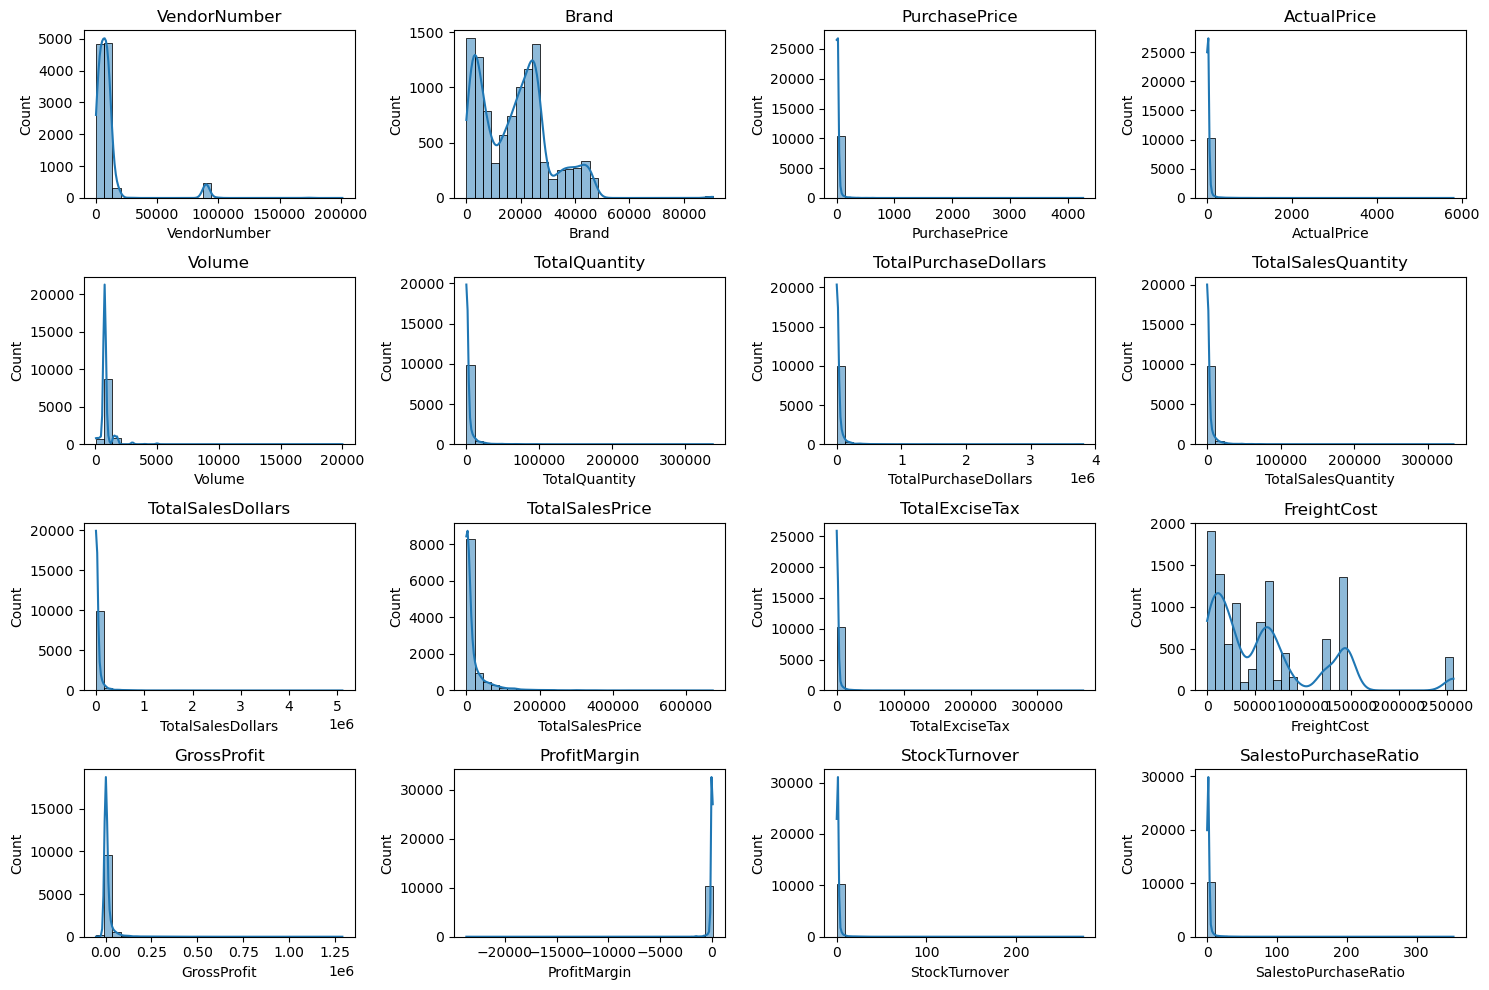

In [6]:
# Distribution Plot for numerical columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) 
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

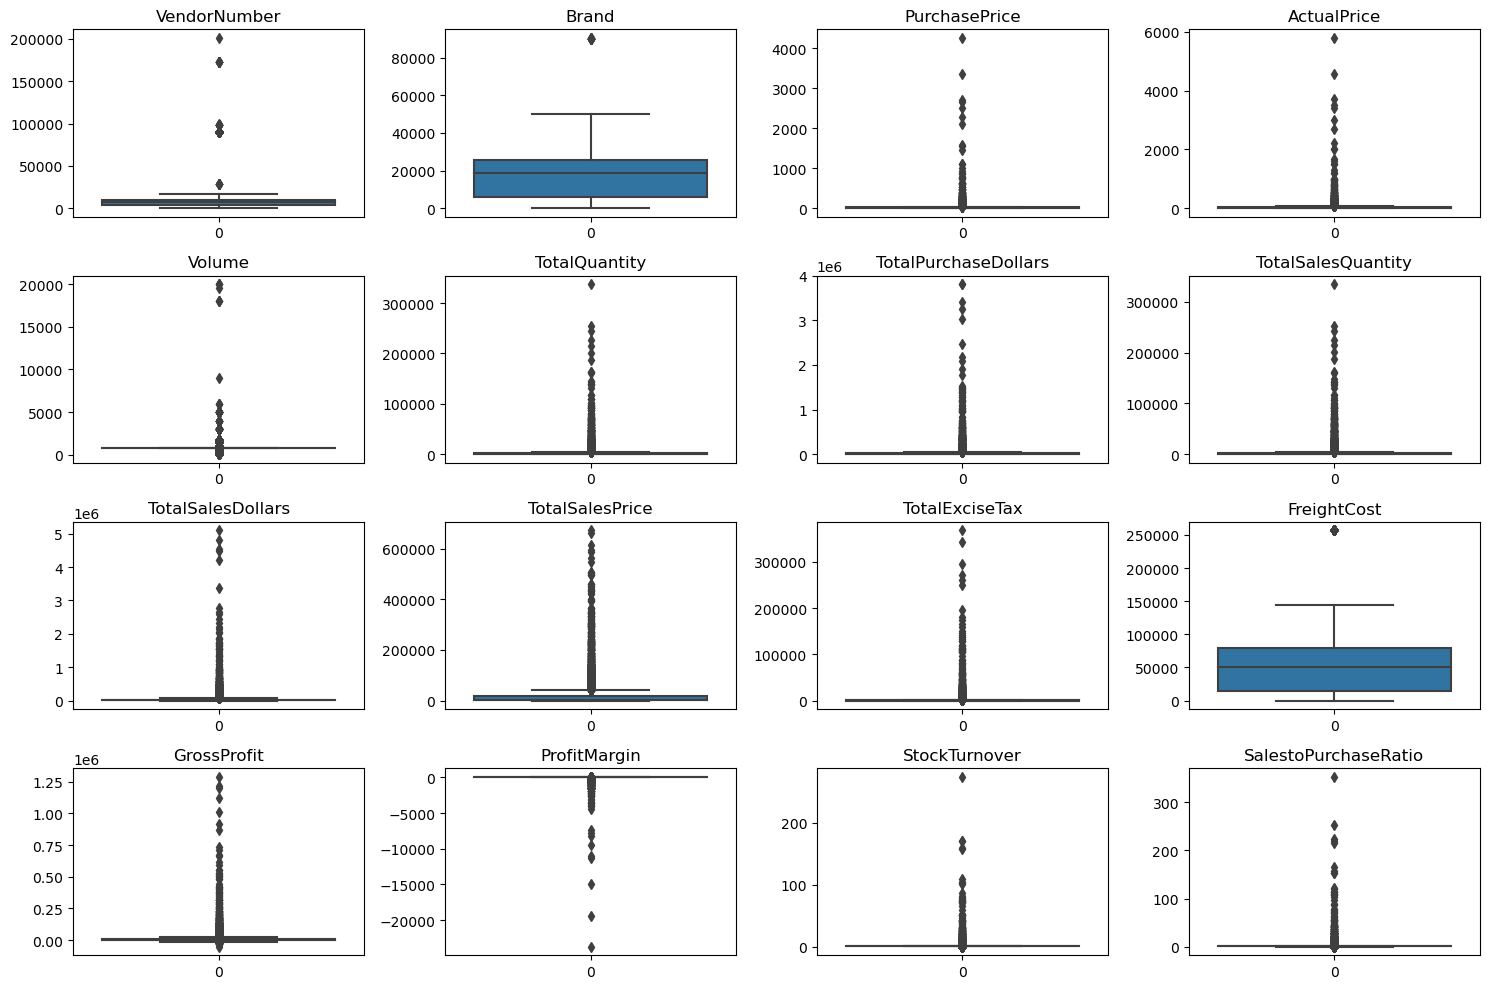

In [7]:
# Creating Boxplot for finding Outliers
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) 
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
# Filtering data by removing inconcsistencies

df = pd.read_sql('''
    SELECT * FROM vendor_sales_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0
''', conn)

df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


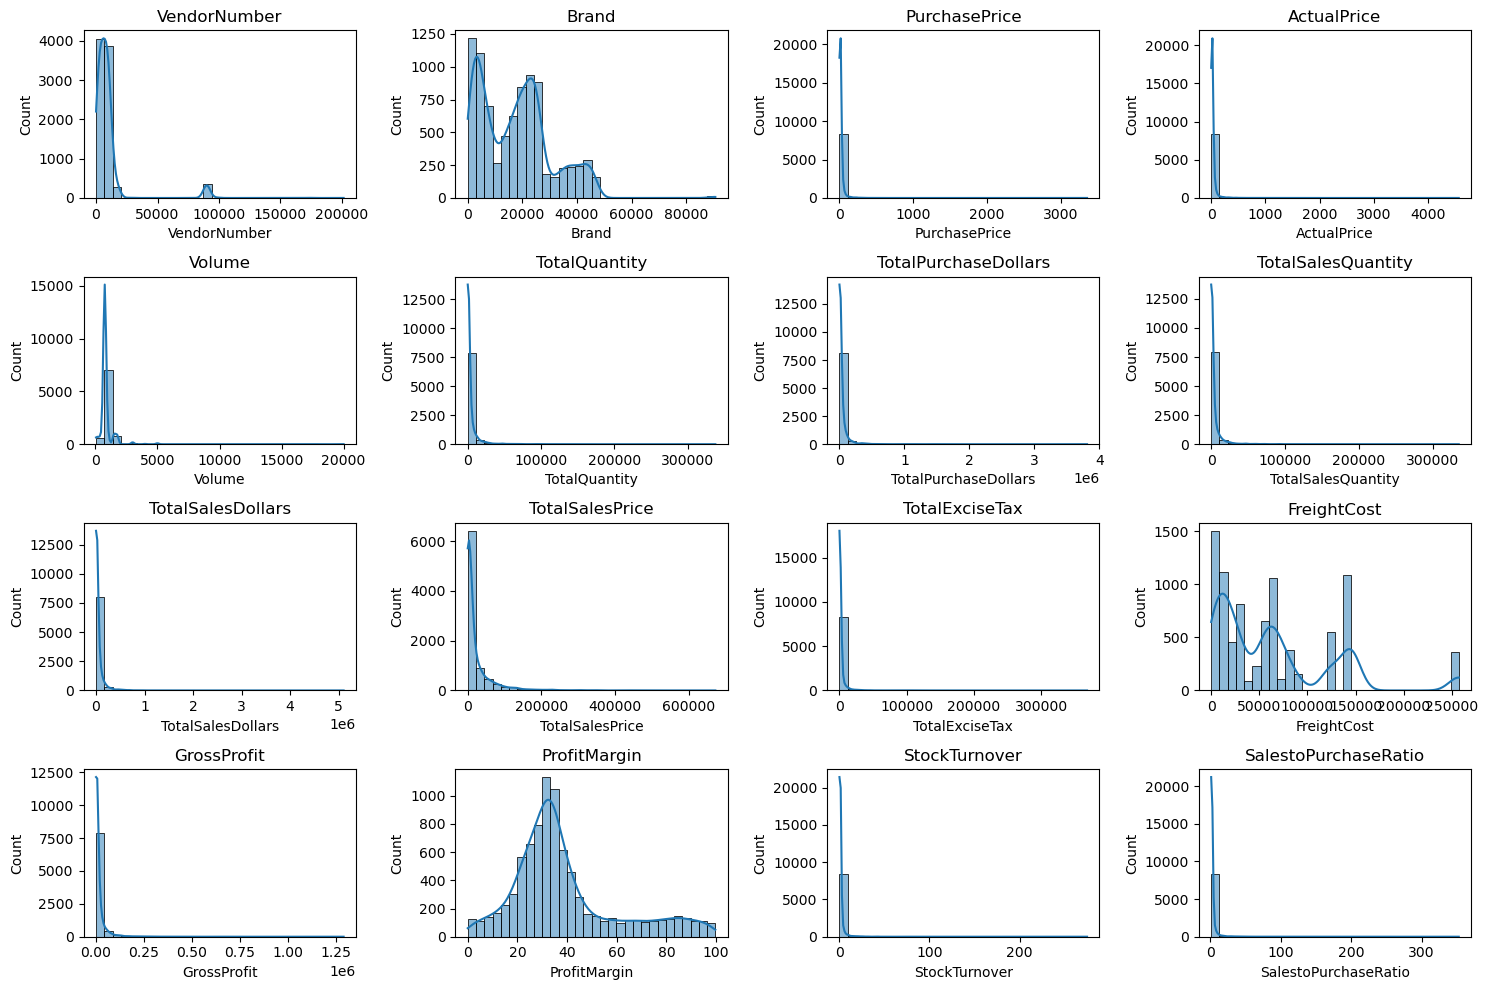

In [10]:
# Distribution Plot for numerical columns after cleaning the data
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) 
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

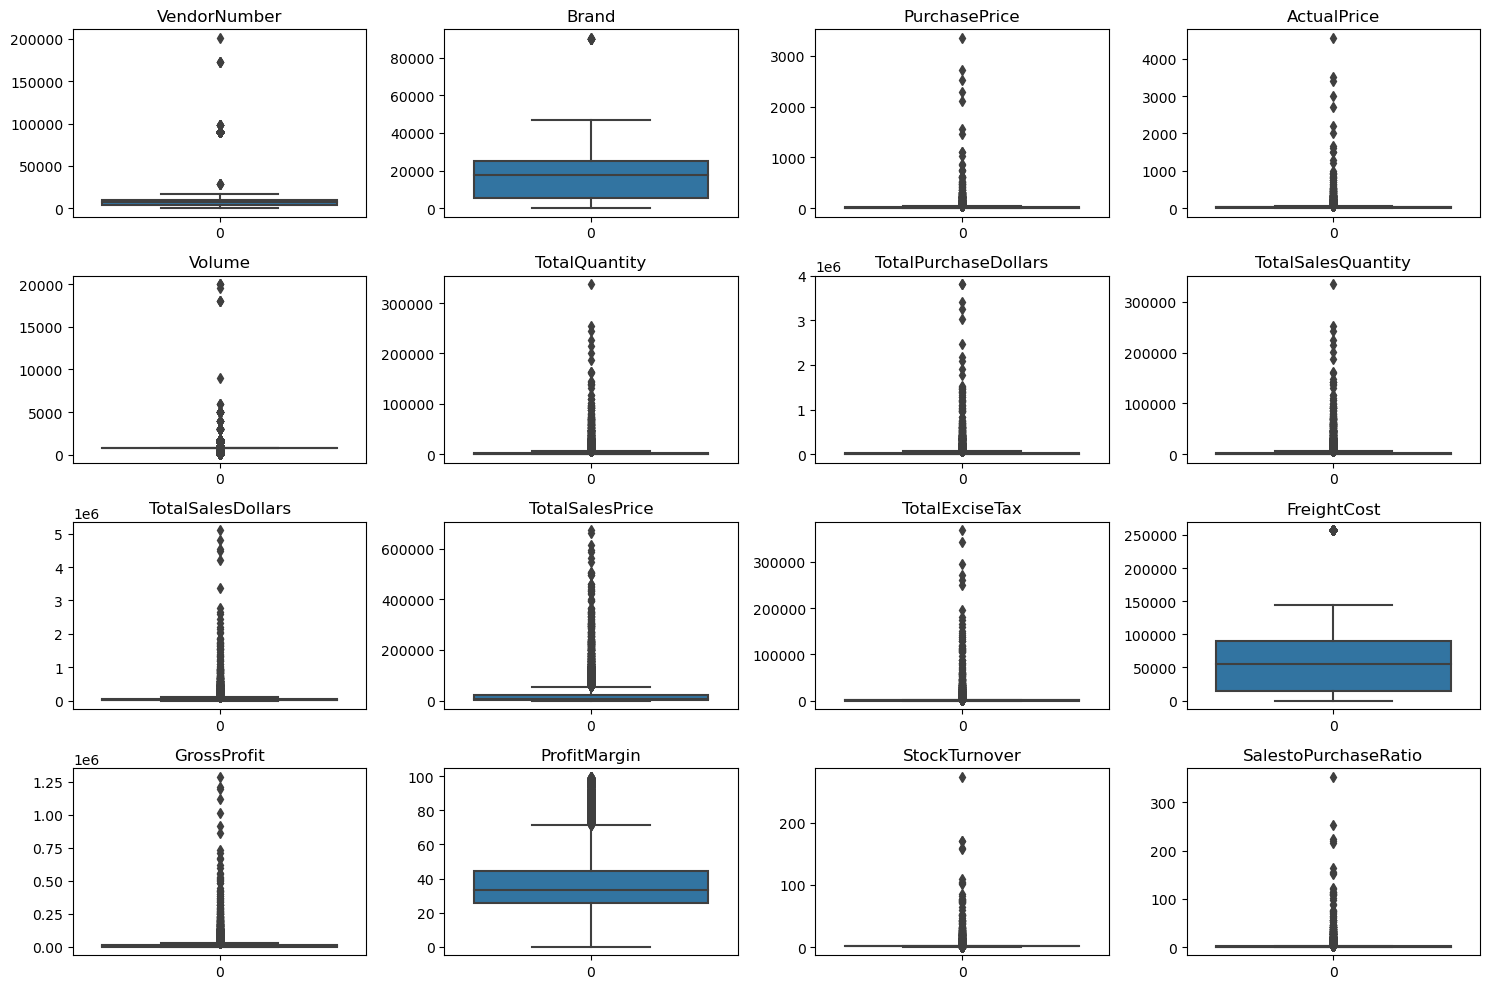

In [11]:
# Creating Boxplot for finding Outliers
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) 
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

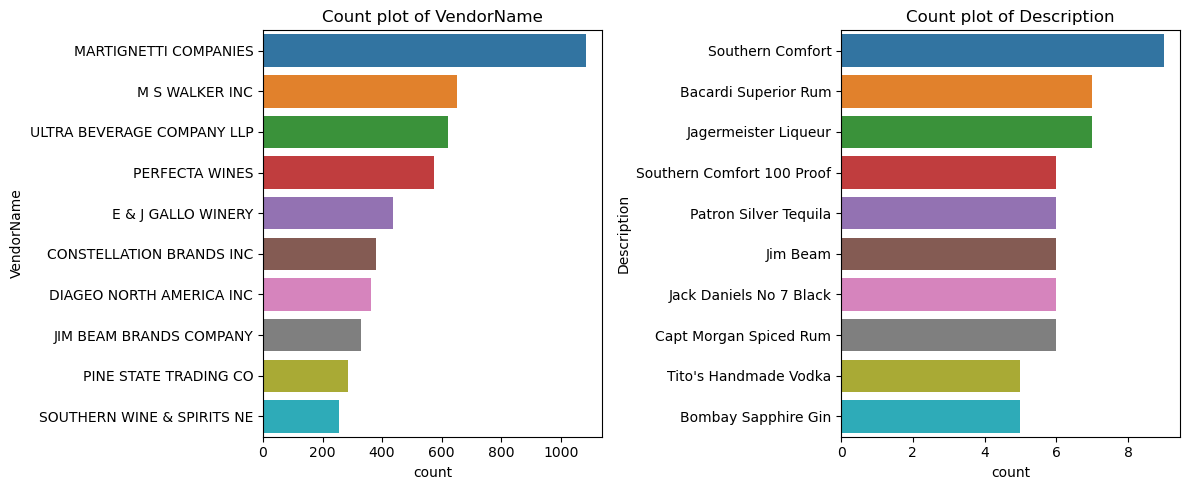

In [13]:
# Count Plot for Categorical Columns

categorical_cols = ['VendorName', 'Description']

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1) # Top 10 Categories
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

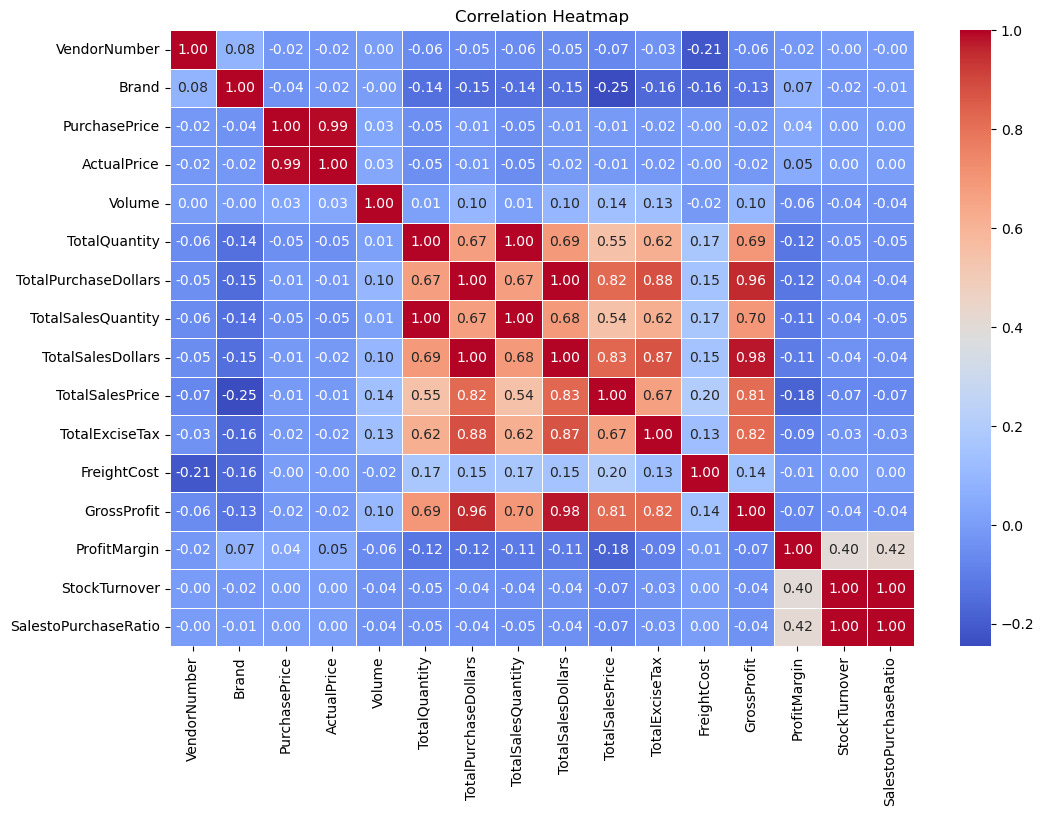

In [15]:
# Correlation Heatmap

plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()

* ***Analyze Brands that needs promotional or pricing adjustment which exhibits lower sales peroformance but higher profit margins***
---

In [17]:
brand_performance_data = df.groupby('Description').agg({
                            'TotalSalesDollars':'sum',
                            'ProfitMargin':'mean'
                        }).reset_index()
brand_performance_data

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [18]:
low_sales_threshold = brand_performance_data['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance_data['ProfitMargin'].quantile(0.85)

In [19]:
low_sales_threshold

560.299

In [20]:
high_margin_threshold

64.97017552750111

In [23]:
# Filter brands with low sales but high profit

target_brands = brand_performance_data[
    (brand_performance_data['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance_data['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with low sales but high profit margins")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


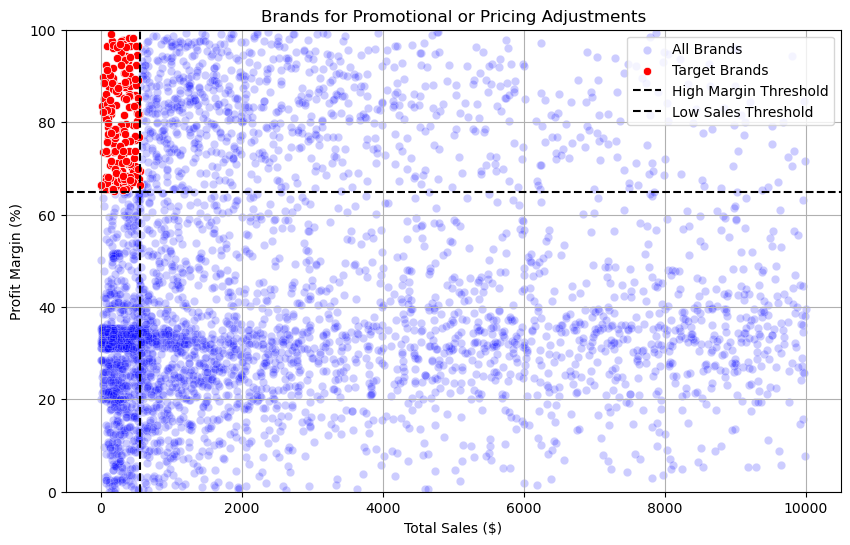

In [32]:
# Plotting Scatter Plot for checking how many brands are below threshold
brand_performance_data2 = brand_performance_data[brand_performance_data['TotalSalesDollars'] < 10000]

plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance_data2, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'red', label = 'Target Brands')

plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = 'High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = 'Low Sales Threshold')

plt.ylim(0,100)

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

***Above are the  Brands that needs promotional or pricing adjustment which exhibits lower sales peroformance but higher profit margins***

---

* ***Which Vendor and Brands demonstrate higher sales performance?***
---


In [37]:
# Fromatting the dollars for making it more readable
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}k"
    else:
        return str(value)

In [34]:
# Top Vendors and Brands by Sales Performance
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)

In [35]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [39]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [40]:
# After formatting dollars
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [41]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

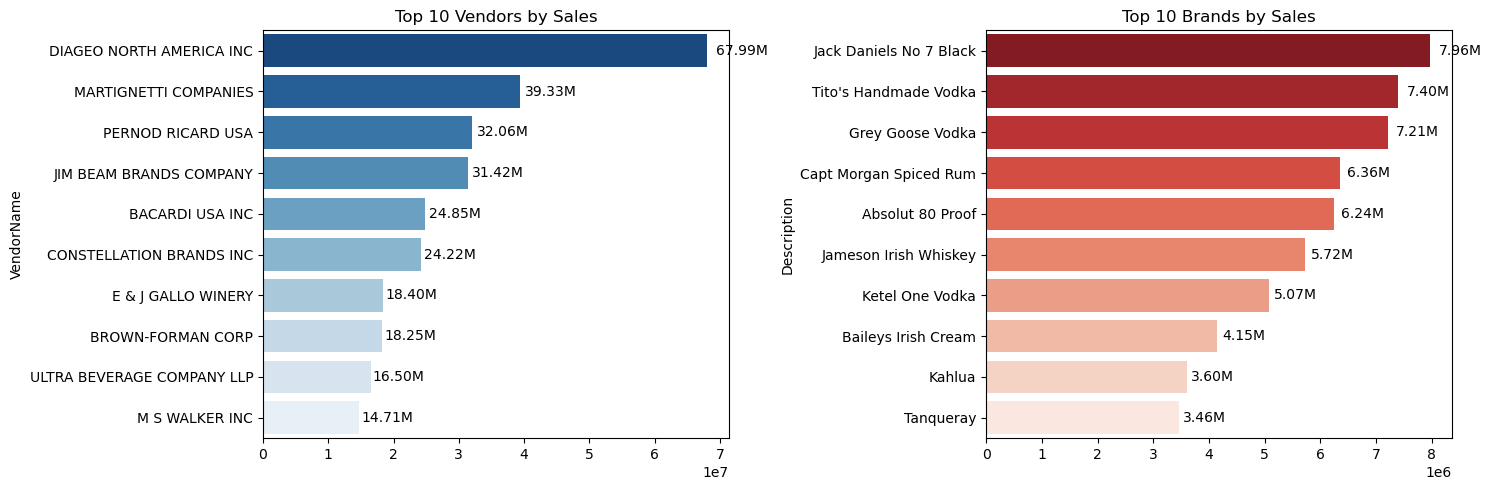

In [53]:
# Plotting Graph for the top brands and top vendors
plt.figure(figsize = (15,5))

# Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = 'Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
    bar.get_y() + bar.get_height() / 2,
    format_dollars(bar.get_width()),
    ha = 'left', va = 'center', fontsize = 10, color = 'black')

plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette = 'Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
    bar.get_y() + bar.get_height() / 2,
    format_dollars(bar.get_width()),
    ha = 'left', va = 'center', fontsize = 10, color = 'black')
    
plt.tight_layout()
plt.show()

***Above are the top 10 Vendors and Brands according to the Sales in Millions***

---

* ***Which Vendor Contribute towards the total purchase dollars?***
---

In [55]:
vendor_performance_data = df.groupby('VendorName').agg({
                            'TotalPurchaseDollars':'sum',
                            'GrossProfit':'sum',
                            'TotalSalesDollars':'sum'
                        }).reset_index()

In [56]:
vendor_performance_data

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [57]:
vendor_performance_data['Purchase Contribution'] = vendor_performance_data['TotalPurchaseDollars'] / vendor_performance_data['TotalPurchaseDollars'].sum() 

In [59]:
vendor_performance_data.sort_values('Purchase Contribution', ascending = False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Contribution
25,DIAGEO NORTH AMERICA INC,50097226.16,1.789287e+07,6.799010e+07,1.630033e-01
57,MARTIGNETTI COMPANIES,25502095.83,1.382826e+07,3.933036e+07,8.297719e-02
68,PERNOD RICARD USA,23851164.17,8.212032e+06,3.206320e+07,7.760548e-02
46,JIM BEAM BRANDS COMPANY,23494304.32,7.928716e+06,3.142302e+07,7.644435e-02
6,BACARDI USA INC,17432020.26,7.422797e+06,2.485482e+07,5.671926e-02
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,1.989500e+02,3.275900e+02,4.185611e-07
107,UNCORKED,118.74,5.820000e+01,1.769400e+02,3.863491e-07
85,SILVER MOUNTAIN CIDERS,77.18,2.653300e+02,3.425100e+02,2.511236e-07
16,CAPSTONE INTERNATIONAL,54.64,1.922300e+02,2.468700e+02,1.777843e-07


In [64]:
top_vendors_performance = vendor_performance_data.sort_values('Purchase Contribution', ascending = False)[:10]
top_vendors_performance['TotalPurchaseDollars'] = top_vendors_performance['TotalPurchaseDollars'].apply(format_dollars)
top_vendors_performance['GrossProfit'] = top_vendors_performance['GrossProfit'].apply(format_dollars)
top_vendors_performance['TotalSalesDollars'] = top_vendors_performance['TotalSalesDollars'].apply(format_dollars)
top_vendors_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.163003
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.082977
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.077605
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.076444
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.056719
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.049697
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.043076
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.039268
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.036335
53,M S WALKER INC,9.76M,4.94M,14.71M,0.031771


In [65]:
top_vendors_performance = round(top_vendors_performance.sort_values('Purchase Contribution', ascending = False), 2)

In [66]:
top_vendors_performance.sort_values('Purchase Contribution', ascending = False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [89]:
top_vendors_performance['CummulativeContribution'] = (top_vendors_performance['Purchase Contribution'].cumsum()) * 100
top_vendors_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Contribution,CummulativeContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,16.0
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,24.0
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,32.0
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,40.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,46.0
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,51.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,55.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,59.0
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,63.0
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,66.0


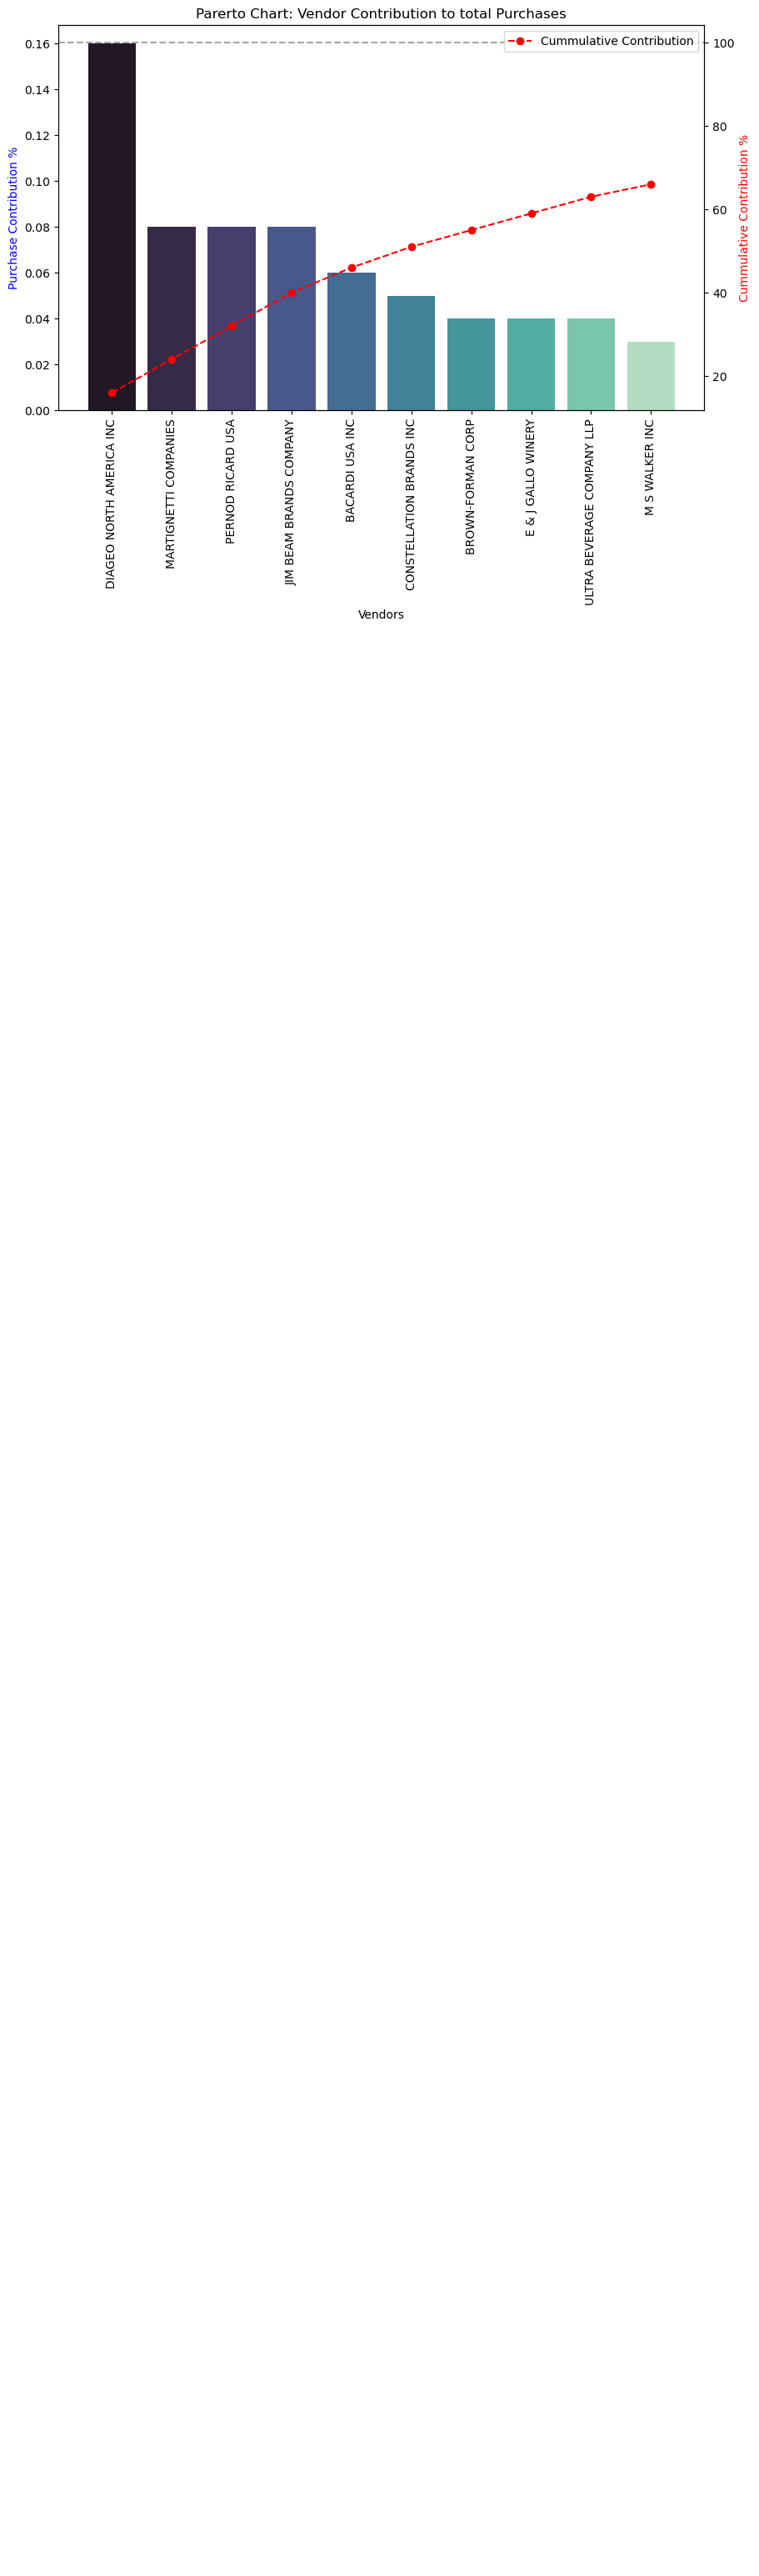

In [100]:
# Plotting Graph for top contributing Vendors
fig, ax1 = plt.subplots(figsize = (10,6))

# Bar Plot for purchase contribution
sns.barplot(x = top_vendors_performance['VendorName'], y = top_vendors_performance['Purchase Contribution'], palette = 'mako', ax = ax1 )

for i, value in enumerate(top_vendors['Purchase Contribution']):
    ax1.text(i, value - 1, str(value) + '%', ha = 'center', fontsize = 10, color = 'white')
    
# Line plot for cummilative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors_performance['VendorName'], top_vendors_performance['CummulativeContribution'],
        color = 'red', marker = 'o', linestyle = 'dashed', label = 'Cummulative Contribution')

ax1.set_xticklabels(top_vendors_performance['VendorName'], rotation = 90)
ax1.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cummulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Parerto Chart: Vendor Contribution to total Purchases')

ax2.axhline(y = 100, color = 'gray', linestyle = 'dashed', alpha = 0.7)
ax2.legend(loc = 'upper right')

plt.show()


***The Above plot shows the vendor contributing towards the Total Purchase Dollars***

---

* ***How Much Total Procurment is depenedent on top vendors***
---

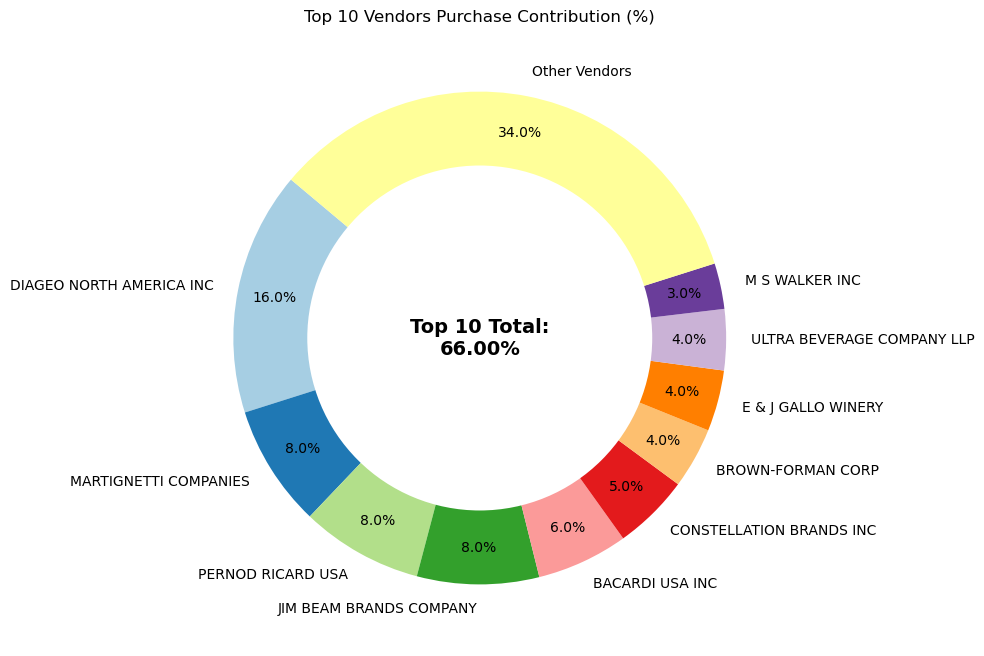

In [105]:
# Total Purchase Contribution of top 10 Vendors is 65.69%
vendors = list(top_vendors_performance['VendorName'].values)
purchase_contributions = list((top_vendors_performance['Purchase Contribution'].values) * 100)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append Other Vendor Category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize = (8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels = vendors, autopct = '%1.1f%%',
                                 startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

# Draw a white circle in the centre to create a donut effect
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

# Addding an annotation in the centre 
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight = 'bold', ha = 'center', va = 'center')
plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

***The above chart shows how much total procurment is dependent on top Vendors***

---

* ***Does Purchasing in bulk reduce the unit price, and what is the optimal purhcasing volume for cost savings***
---

In [108]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalQuantity']
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89


In [111]:
df['OrderSize'] = pd.qcut(df['TotalQuantity'], q = 3, labels = ['Small', 'Large', 'Medium'])
df.tail()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71,Small


In [112]:
df.OrderSize.unique()

['Medium', 'Large', 'Small']
Categories (3, object): ['Small' < 'Large' < 'Medium']

In [113]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     39.057543
Large     15.486414
Medium    10.777625
Name: UnitPurchasePrice, dtype: float64

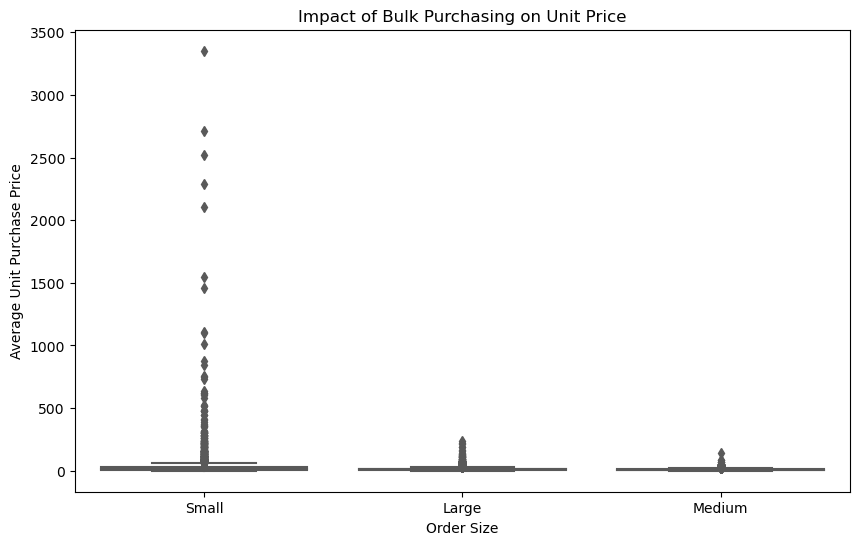

In [115]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'OrderSize', y = 'UnitPurchasePrice', palette = 'Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

***The above figure shows that bulk puchase results in lower unit purchase price***

---

* ***Which Vendors have low inventory turnover, indicating excess stock and slow moving products?***
---

In [122]:
df[df['StockTurnover'] < 1].groupby('VendorName')['StockTurnover'].mean().sort_values(ascending = True).head(10)

VendorName
ALISA CARR BEVERAGES           0.615385
HIGHLAND WINE MERCHANTS LLC    0.708333
PARK STREET IMPORTS LLC        0.751306
Circa Wines                    0.755676
Dunn Wine Brokers              0.766022
CENTEUR IMPORTS LLC            0.773953
SMOKY QUARTZ DISTILLERY LLC    0.783835
TAMWORTH DISTILLING            0.797078
THE IMPORTED GRAPE LLC         0.807569
WALPOLE MTN VIEW WINERY        0.820548
Name: StockTurnover, dtype: float64

* ***How much capital is locked in unsold inventory and which vendors contribute the most towards it***
---

In [126]:
df['UnsoldInvetoryValue'] = (df['TotalQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital: ',format_dollars(df['UnsoldInvetoryValue'].sum()))

Total Unsold Capital:  2.71M


In [130]:
# Aggregate Captial locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInvetoryValue"].sum().reset_index()

# Sort Vendor by highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'UnsoldInvetoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInvetoryValue'] = inventory_value_per_vendor['UnsoldInvetoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInvetoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


* ***What is the 95% confidence intervals for profit margins of top performing and low performing vendors***
---

In [133]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [134]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [135]:
# Function for finding confidence interval
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1) / np.sqrt(len(data)) # Standard Error
    t_critical = stats.t.ppf((1+confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical + std_err
    return mean_val, mean_val-margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (28.988951, 33.355534), Mean: 31.172243
Low Vendors 95% CI: (39.044123, 44.055403), Mean: 41.549763


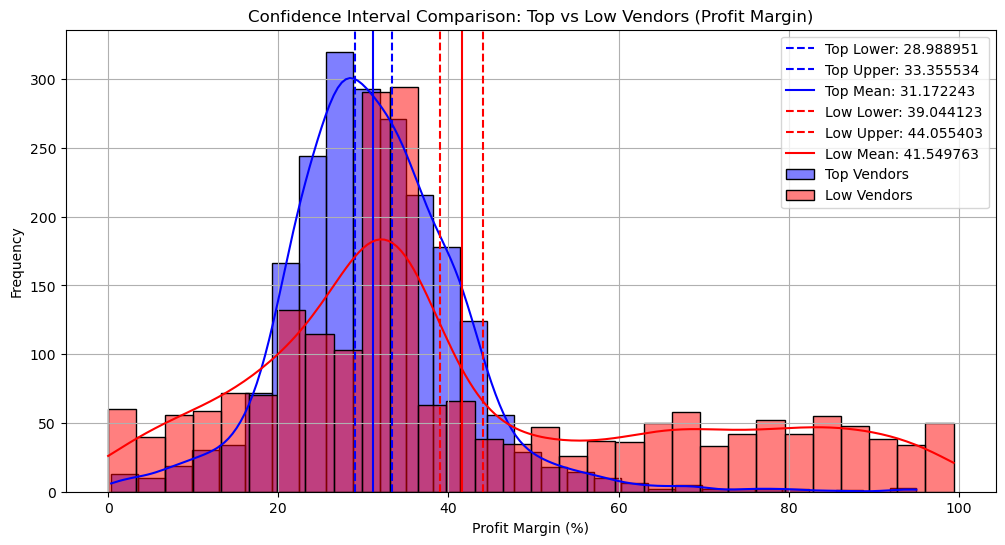

In [143]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:2f}, {top_upper:2f}), Mean: {top_mean:2f}")
print(f"Low Vendors 95% CI: ({low_lower:2f}, {low_upper:2f}), Mean: {low_mean:2f}")
      
plt.figure(figsize = (12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde = True, color = "blue", bins = 30, alpha = 0.5, label = "Top Vendors")
plt.axvline(top_lower, color = 'blue', linestyle = '--', label = f'Top Lower: {top_lower:2f}')
plt.axvline(top_upper, color = 'blue', linestyle = '--', label = f'Top Upper: {top_upper:2f}')
plt.axvline(top_mean, color = 'blue', linestyle = '-', label = f'Top Mean: {top_mean:2f}')

# Low Vendors Plot
sns.histplot(low_vendors, kde = True, color = "red", bins = 30, alpha = 0.5, label = "Low Vendors")
plt.axvline(low_lower, color = 'red', linestyle = '--', label = f'Low Lower: {low_lower:2f}')
plt.axvline(low_upper, color = 'red', linestyle = '--', label = f'Low Upper: {low_upper:2f}')
plt.axvline(low_mean, color = 'red', linestyle = '-', label = f'Low Mean: {low_mean:2f}')

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

* ***Hypothesis Testing***
---

### ***Is there a Significant difference in the profit margins between top-performing and low-performing vendors?***
---

***Hypothesis:***
- Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors

- H1 (Alternative Hypothesis): The mean profit margin of top performing and low performing vendors are significantly different

In [144]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform two sample T test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

# Printing Results
print(f"T-Statastic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference between profit margins of top-performing and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in the profit margins.")

T-Statastic: -17.6440, P-Value: 0.0000
Reject Ho: There is a significant difference between profit margins of top-performing and low-performing vendors.
